In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle
from skimpy import skim

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
!pip install skimpy

In [4]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 768    │ │ int64       │ 7     │                                    │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃           ┃ missing ┃ complete   ┃ mean ┃ sd   ┃ p0    ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃           ┃         ┃ rate       ┃      ┃      ┃       ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnanci │       0 │          1 │  3.8 │  3.4 │     0 │    1 │    6 │   17 │  █▅▃▁  │  │
│ │ es        │         │            │      │      │       │      │      │      │        │  │
│ │ Glucose   │       0 │          1 │  120 │   32 │     0 │   99 │  140 │  200 │   ▄█▄▂ │  │
│ │ BloodPres │       0 │          1 │   69 │   19 │     0 │   62 │   80 │  120 │ ▁ ▂█▃  │  │
│ │ sure      │         │            │      │      │       │      │      │      │        │  │
│ │ SkinThick │       0 │          1 │   21 │   16 │     0 │    0 │   32 │   99 │  ██▅   │  │
│ │ ness      │         │            │      │      │       │      │      │      │        │  │
│ │ Insulin   │       0 │          1 │   80 │  120 │     0 │    0 │  130 │  850 │   █▂   │  │
│ │ BMI       │       0 │          1 │   32 │  7.9 │     0 │   27 │   37 │   67 │  ▁█▆▁  │  │
│ │ DiabetesP │       0 │          1 │ 0.47 │ 0.33 │ 0.078 │ 0.24 │ 0.63 │  2.4 │  █▄▁   │  │
│ │ edigreeFu │         │            │      │      │       │      │      │      │        │  │
│ │ nc        │         │            │      │      │       │      │      │      │        │  │
│ │ Age       │       0 │          1 │   33 │   12 │    21 │   24 │   41 │   81 │  █▃▂▁  │  │
│ │ Outcome   │       0 │          1 │ 0.35 │ 0.48 │     0 │    0 │    1 │    1 │ █    ▄ │  │
│ └───────────┴─────────┴────────────┴──────┴──────┴───────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [7]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Insulin'] = df['Insulin'].replace(0 , df['Insulin'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0 , df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0 , df['SkinThickness'].mean())
df['Glucose'] = df['Glucose'].replace(0 , df['Glucose'].mean())

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

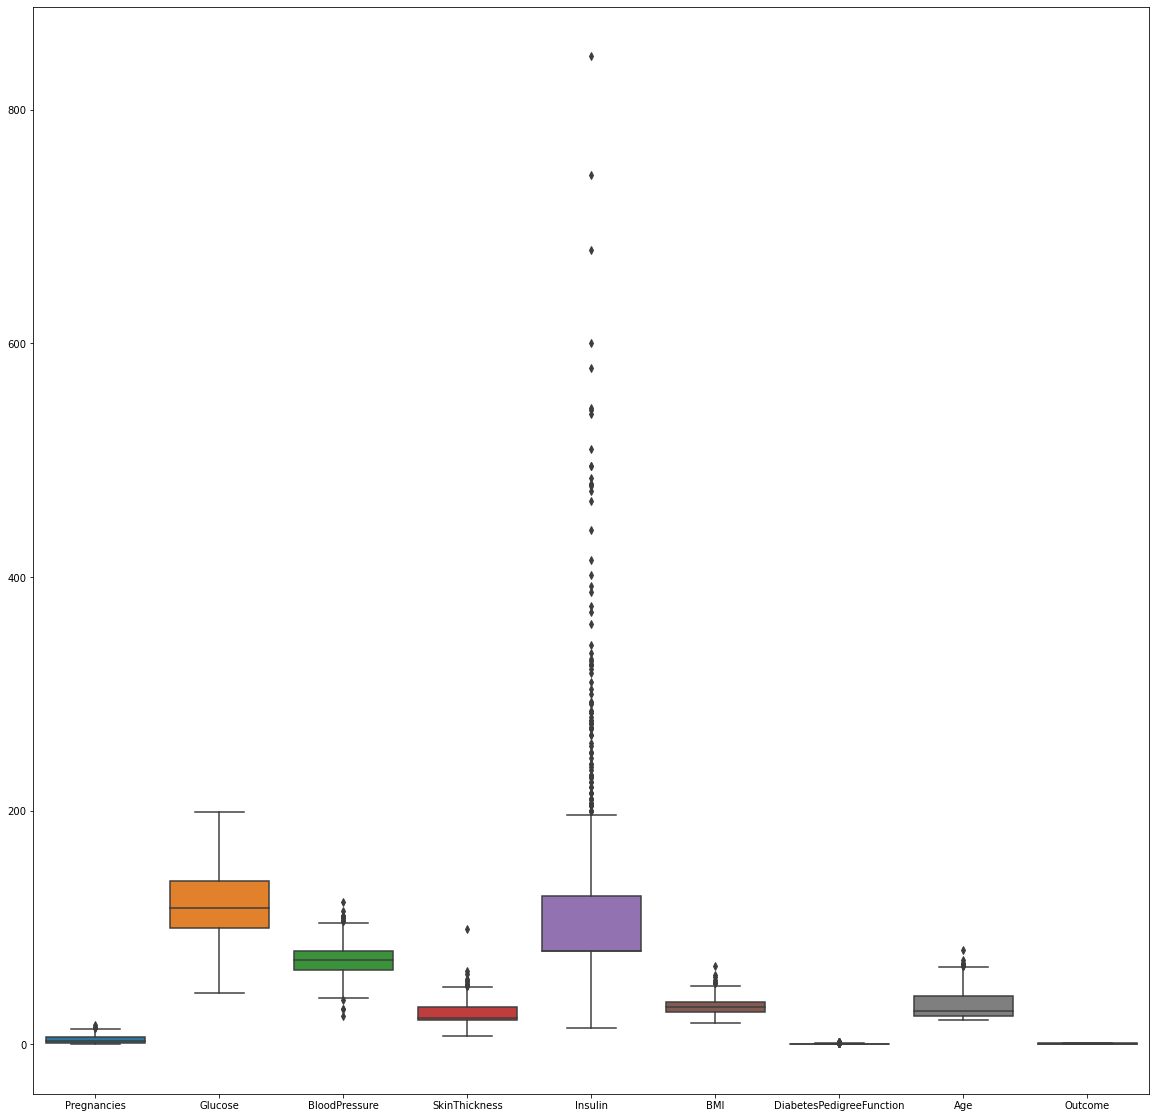

In [9]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [10]:
q = df['Pregnancies'].quantile(.98)
df_new = df[df['Pregnancies'] < q]

q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI']< q]

q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness']< q]

q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin']< q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']< q]


q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age']< q]

df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[674 rows x 9 columns]

<AxesSubplot:>

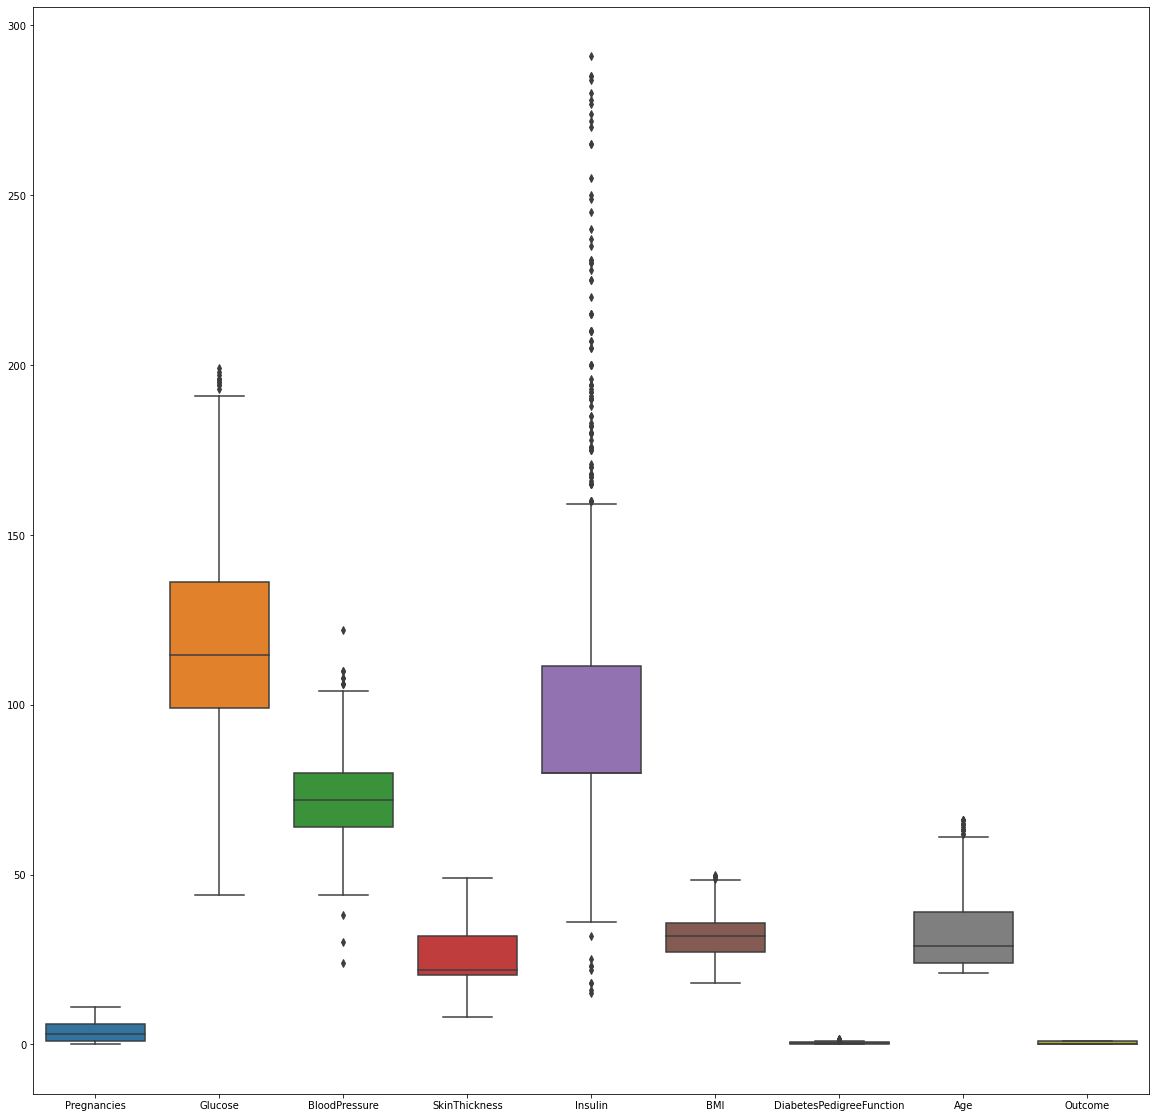

In [11]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [12]:
ProfileReport(df_new)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
skim(df_new)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 674    │ │ float64     │ 6     │                                    │
│ │ Number of columns │ 9      │ │ int64       │ 3     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃            ┃ missing ┃ complete   ┃ mean ┃ sd   ┃ p0    ┃ p25  ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┃            ┃         ┃ rate       ┃      ┃      ┃       ┃      ┃     ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancie │       0 │          1 │  3.6 │    3 │     0 │    1 │   6 │   11 │ █▆▄▃▂▁ │  │
│ │ s          │         │            │      │      │       │      │     │      │        │  │
│ │ Glucose    │       0 │          1 │  120 │   29 │    44 │   99 │ 140 │  200 │  ▄█▅▂▁ │  │
│ │ BloodPress │       0 │          1 │   72 │   12 │    24 │   64 │  80 │  120 │  ▁█▆▁  │  │
│ │ ure        │         │            │      │      │       │      │     │      │        │  │
│ │ SkinThickn │       0 │          1 │   26 │  8.5 │     8 │   21 │  32 │   49 │ ▁█▃▃▂▁ │  │
│ │ ess        │         │            │      │      │       │      │     │      │        │  │
│ │ Insulin    │       0 │          1 │  100 │   49 │    15 │   80 │ 110 │  290 │  ▁█▁▁  │  │
│ │ BMI        │       0 │          1 │   32 │  6.4 │    18 │   27 │  36 │   50 │ ▂▆█▆▂▁ │  │
│ │ DiabetesPe │       0 │          1 │ 0.45 │ 0.29 │ 0.078 │ 0.24 │ 0.6 │  1.5 │ █▅▃▁▁  │  │
│ │ digreeFunc │         │            │      │      │       │      │     │      │        │  │
│ │ Age        │       0 │          1 │   32 │   11 │    21 │   24 │  39 │   66 │ █▃▃▁▁▁ │  │
│ │ Outcome    │       0 │          1 │ 0.33 │ 0.47 │     0 │    0 │   1 │    1 │ █    ▄ │  │
│ └────────────┴─────────┴────────────┴──────┴──────┴───────┴──────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [14]:
y = df_new['Outcome']
x= df_new.drop(columns=['Outcome'])

In [15]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [16]:
x

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[674 rows x 8 columns]

In [17]:
scalar = StandardScaler()
ProfileReport(pd.DataFrame(scalar.fit_transform(x)))
x_scaled = scalar.fit_transform(x)

<AxesSubplot:>

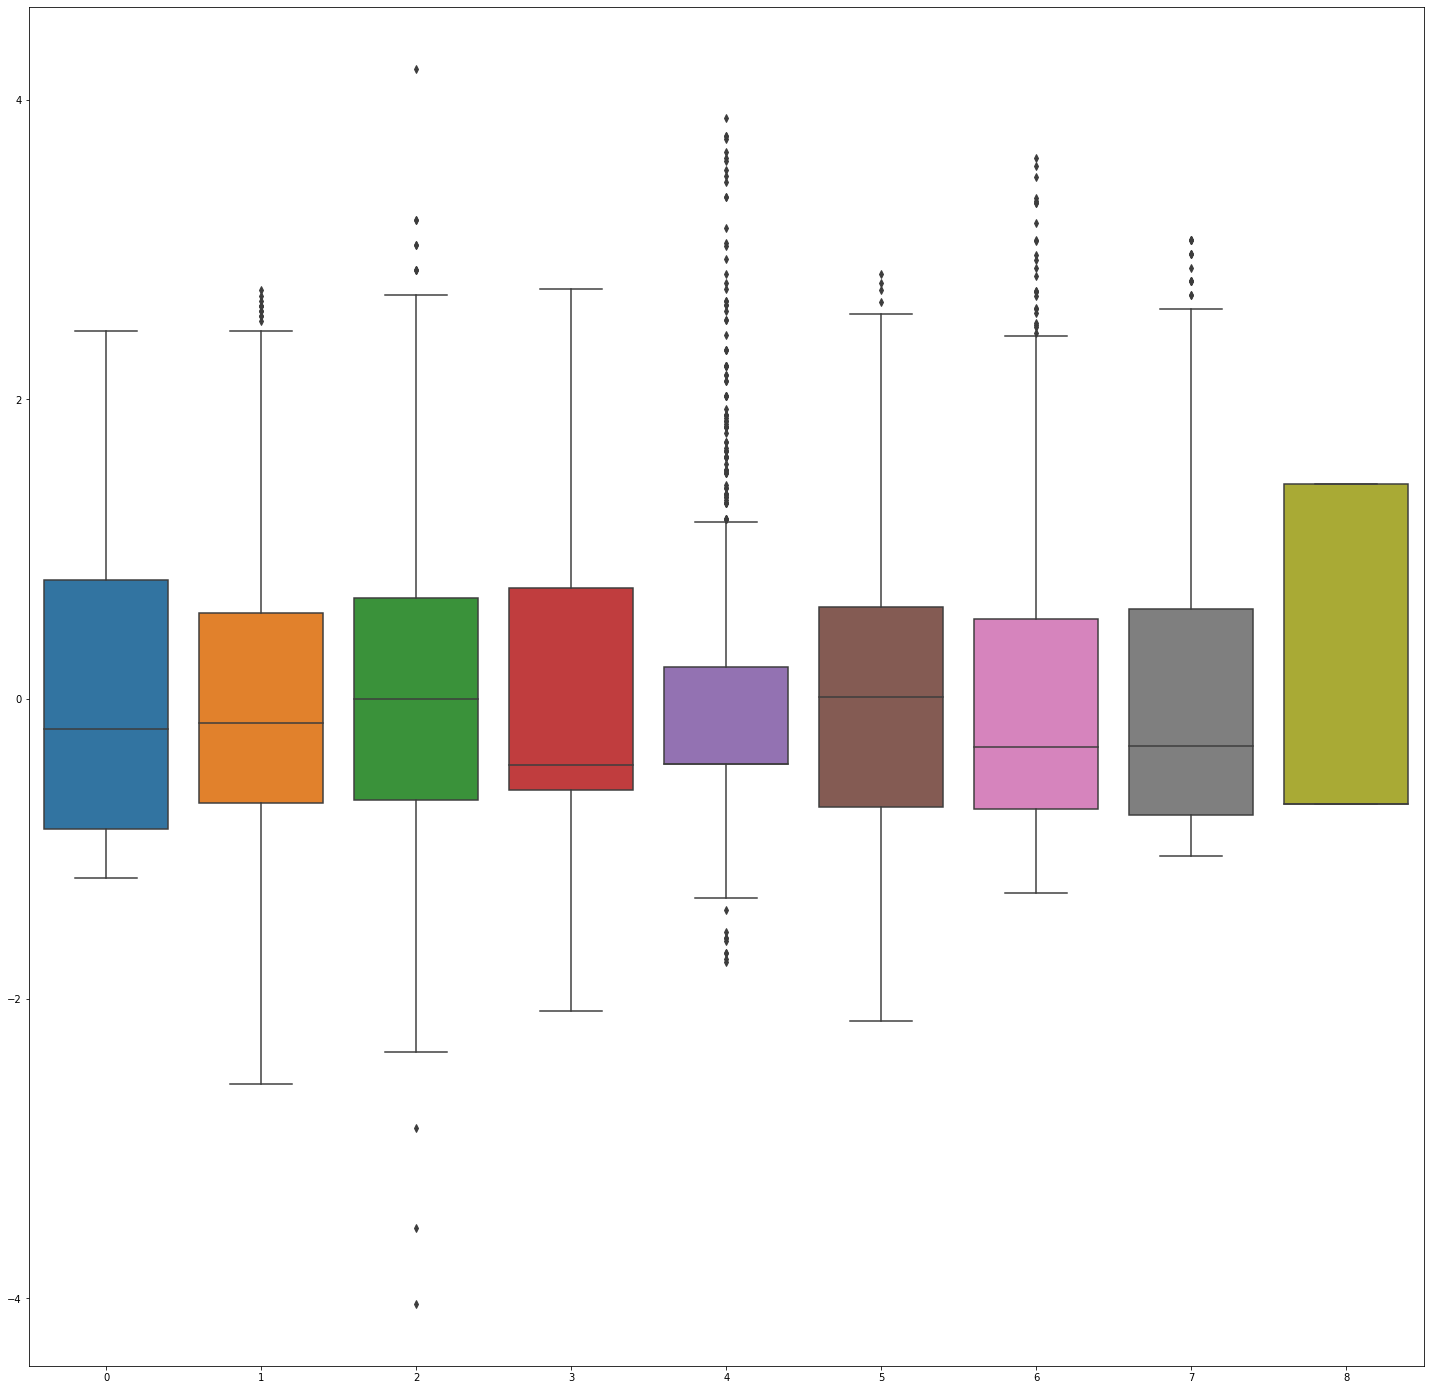

In [18]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_new))
fig ,ax  = plt.subplots(figsize = (25,25))
sns.boxplot(data = df_new_scalar , ax = ax)

In [19]:
x_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [20]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [21]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [22]:
vif_score(x)

FEATURE  VIF_SCORE
0               Pregnancies   1.449056
1                   Glucose   1.304263
2             BloodPressure   1.262686
3             SkinThickness   1.470049
4                   Insulin   1.271017
5                       BMI   1.513160
6  DiabetesPedigreeFunction   1.042300
7                       Age   1.662728

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size = .20 , random_state = 144)

In [24]:
x_train

array([[-0.86479354,  0.19769063, -1.85094678, ...,  0.21879402,
         1.80609569, -0.40651517],
       [ 2.45830136,  1.22329076,  0.33707068, ...,  0.21879402,
         3.1782269 ,  1.69268475],
       [ 0.13213493,  0.91561072,  1.09446134, ..., -0.47091521,
        -0.90658316, -0.49778473],
       ...,
       [-0.86479354, -0.28092276,  1.17861586, ..., -0.28281269,
        -1.06801036, -0.86286298],
       [ 1.46137289,  0.02675728,  0.50537972, ..., -1.08224839,
        -0.13454002,  2.87918905],
       [-0.86479354, -0.75953616, -0.33616546, ..., -0.73739378,
         2.27283086, -0.95413254]])

In [25]:
x_test

array([[ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, ...,
        -4.70915211e-01, -2.50346495e-01,  1.23633694e+00],
       [-1.19710303e+00,  6.76304024e-01, -8.41092564e-01, ...,
        -1.53682948e+00, -8.43415997e-01, -1.04540210e+00],
       [ 2.45830136e+00,  8.13050708e-01,  1.85185200e+00, ...,
         7.36075942e-01, -6.78479508e-01,  1.69268475e+00],
       ...,
       [ 7.96753910e-01, -5.54416131e-01, -5.04474494e-01, ...,
        -1.19197486e+00, -6.96025943e-01, -3.15245608e-01],
       [-5.32484049e-01, -1.20396288e+00, -2.43135269e-01, ...,
         1.38528976e-02, -5.03015158e-01, -1.04540210e+00],
       [-8.64793539e-01, -1.64838960e+00, -2.01925581e+00, ...,
        -1.80330804e+00, -4.36338705e-01, -9.54132539e-01]])

In [26]:
x_test[0]

array([ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, -6.09921498e-01,
       -4.34192020e-01, -4.70915211e-01, -2.50346495e-01,  1.23633694e+00])

In [27]:
logr=logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [28]:
logr_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [29]:
logr.predict_proba([x_test[1]])

array([[0.91450958, 0.08549042]])

In [30]:
logr.predict([x_test[1]])

array([0], dtype=int64)

In [31]:
logr.predict_log_proba([x_test[1]])

array([[-0.08936734, -2.45935091]])

In [32]:
type(y_test)

pandas.core.series.Series

In [33]:
y_test.iloc[1]

0

In [34]:
y_test

406    1
511    0
24     1
751    0
689    1
      ..
3      0
469    0
587    0
60     0
97     0
Name: Outcome, Length: 135, dtype: int64

In [35]:
logr1 = LogisticRegression(verbose=1)

In [36]:
logr1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [37]:
logr_liblinear

LogisticRegression(solver='liblinear', verbose=1)

In [38]:
logr

LogisticRegression(solver='liblinear', verbose=1)

In [39]:
y_pred_liblinear = logr_liblinear.predict(x_test)

y_pred_liblinear

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [40]:
y_pred_default = logr1.predict(x_test)

In [41]:
y_pred_default

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [42]:
confusion_matrix(y_test,y_pred_liblinear)

array([[77, 10],
       [24, 24]], dtype=int64)

In [43]:
confusion_matrix(y_test,y_pred_default)

array([[77, 10],
       [24, 24]], dtype=int64)

In [44]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result


model_eval(y_test,y_pred_liblinear)

{'Accuracy': 0.7481481481481481,
 'Precision': 0.7058823529411765,
 'Recall': 0.5,
 'Specficity': 0.8850574712643678,
 'F1': 0.5853658536585366}

In [45]:
auc = roc_auc_score(y_test,y_pred_liblinear)

In [46]:
roc_auc_score(y_test,y_pred_default)

0.692528735632184

In [47]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)

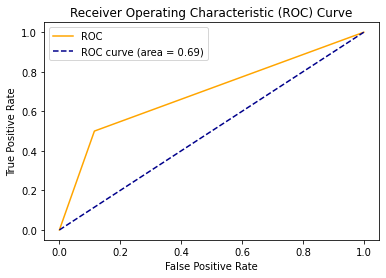

In [48]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()